# BCycle Austin Full / Empty models

This notebook concludes the BCycle Austin series of blog posts, and looks at how machine learning could be used to help the BCycle team. I'll be using weather data in addition to the station and bike information, and building models which I hope might be useful. Let's get started !

## Imports and data loading

Before getting started, let's import some useful libraries for visualization, and the bcycle utils library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

import datetime

from bcycle_lib.utils import *

%matplotlib inline
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading weather and rental data


In [49]:
bikes_df = load_bikes()
bike_trips_df = load_bike_trips()
stations_df = load_stations()
weather_df = load_weather()

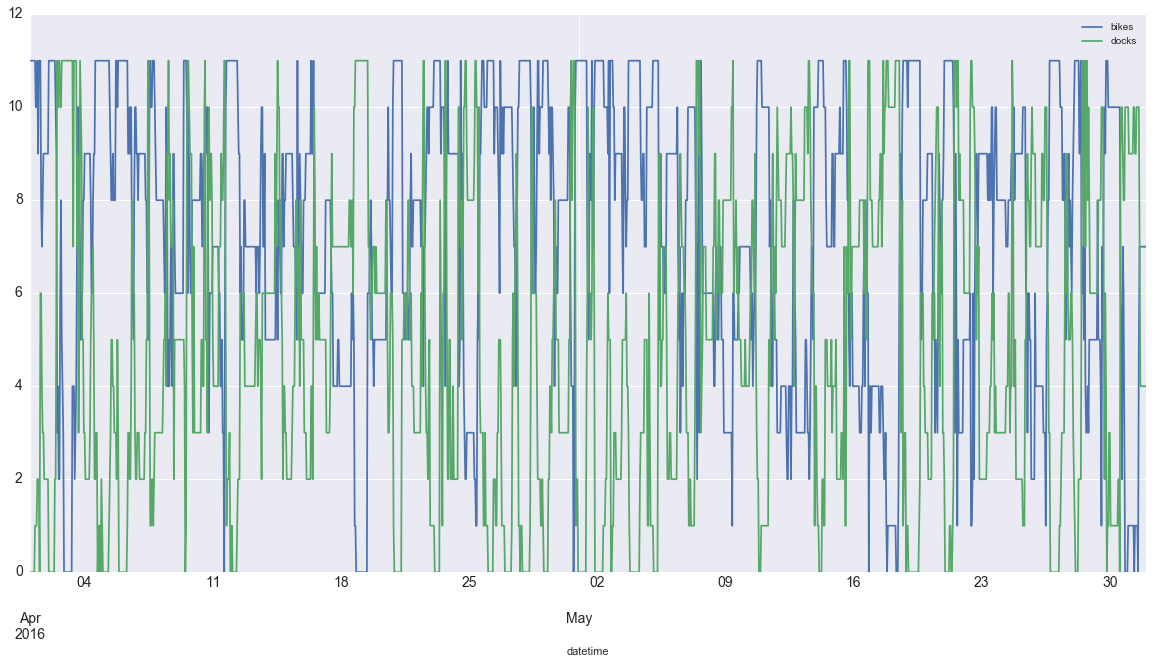

In [80]:
bike_empty_mask = bike_trips_df['bikes'] == 0
bike_full_mask = bike_trips_df['docks'] == 0
bike_empty_full_mask = bike_empty_mask | bike_full_mask

# bike_trips_df[bike_trips_df['station_id'==1]] # , 'checkouts']

bike_trips_df.loc[bike_trips_df['station_id'] == 37, ['bikes', 'docks']].resample('1H').max().plot.line(figsize=(20,10))
# bike_trips_df = bike_trips_df[bike_empty_full_mask]
# bike_trips_df['empty'] =  bike_trips_df['bikes'] == 0
# bike_trips_df['full'] = bike_trips_df['docks'] == 0
# bike_trips_df.head()

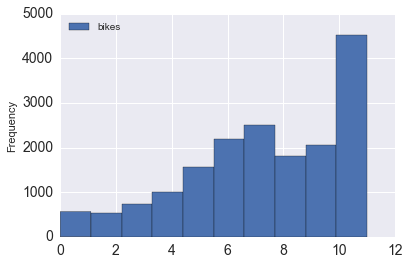

In [107]:
bike_trips_df.loc[bike_trips_df['station_id'] == 13, ['bikes']].plot.hist()

In [62]:
stations_df

,station_id,name,address,lat,lon,datetime
0,1,2nd & Congress,"151 E. 2nd St, Austin, TX 78701",30.264080,-97.743553,2016-04-01 00:00:00
1,2,4th & Congress,"120 W. 4th St., Austin, TX 78701",30.266340,-97.743782,2016-04-01 00:00:00
2,3,8th & Congress,"111 E. 8th St., Austin, TX 78701",30.269800,-97.741859,2016-04-01 00:00:00
3,4,Capitol Station / Congress & 11th,"1090 Congress Ave., Austin, TX 78701",30.272600,-97.741272,2016-04-01 00:00:00
4,5,City Hall / Lavaca & 2nd,"Presented by Graves Dougherty Hearon & Moody, ...",30.264759,-97.746780,2016-04-01 00:00:00
5,6,5th & Bowie,"Presented by Whole Foods Market, Austin, TX 78703",30.269600,-97.753319,2016-04-01 00:00:00
6,7,Barton Springs & Riverside,"400 Barton Springs Rd., Austin, TX 78704",30.258699,-97.748718,2016-04-01 00:00:00
7,8,South Congress & James,"Presented by The Austin Chronicle, Austin, TX ...",30.251030,-97.749260,2016-04-01 00:00:00
8,9,South Congress & Elizabeth,"101 Elizabeth St. W, Austin, TX 78704",30.248911,-97.750191,2016-04-01 00:00:00
9,10,Waller & 6th St.,"602 Waller St., Austin, TX 78702",30.264610,-97.730492,2016-04-01 00:00:00
